In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [156]:
data=pd.read_csv("Telecom_Customer_Churn.csv")

In [157]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [77]:
data.shape

(2695, 21)

In [78]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2695 entries, 0 to 2694
Data columns (total 21 columns):
customerID          2695 non-null object
gender              2695 non-null object
SeniorCitizen       2695 non-null int64
Partner             2695 non-null object
Dependents          2695 non-null object
tenure              2695 non-null int64
PhoneService        2695 non-null object
MultipleLines       2695 non-null object
InternetService     2695 non-null object
OnlineSecurity      2695 non-null object
OnlineBackup        2695 non-null object
DeviceProtection    2695 non-null object
TechSupport         2695 non-null object
StreamingTV         2695 non-null object
StreamingMovies     2695 non-null object
Contract            2694 non-null object
PaperlessBilling    2694 non-null object
PaymentMethod       2694 non-null object
MonthlyCharges      2694 non-null float64
TotalCharges        2694 non-null object
Churn               2694 non-null object
dtypes: float64(1), int64(2), obj

In [106]:
#Check Duplicate
data.duplicated().sum()

0

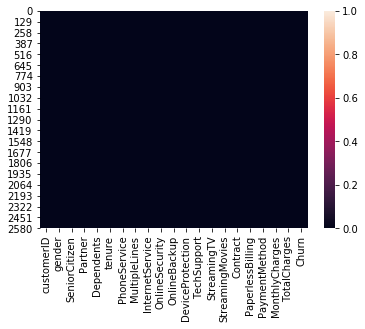

In [81]:
#To check missing value
sns.heatmap(data.isnull())

In [82]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            1
PaperlessBilling    1
PaymentMethod       1
MonthlyCharges      1
TotalCharges        1
Churn               1
dtype: int64

In [158]:
data=data.dropna()

In [159]:
data.nunique()

customerID          2694
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1140
TotalCharges        2616
Churn                  2
dtype: int64

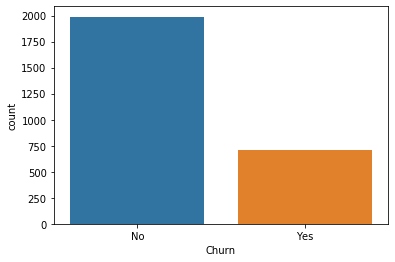

In [160]:
sns.countplot(x='Churn',data=data)

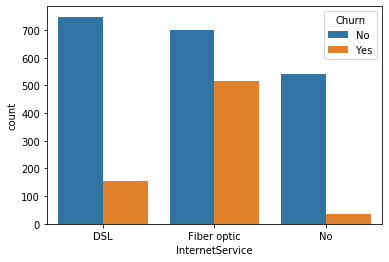

In [161]:
sns.countplot(x='InternetService',hue='Churn',data=data)

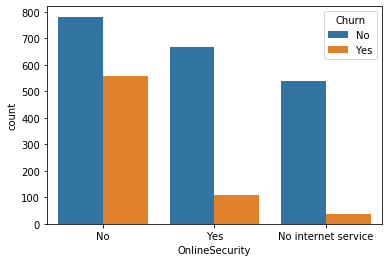

In [162]:
sns.countplot(x='OnlineSecurity',hue='Churn',data=data)

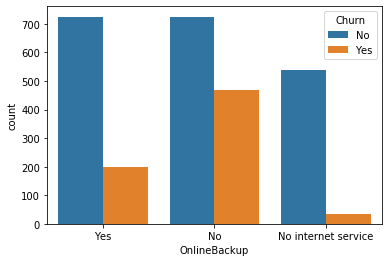

In [163]:
sns.countplot(x='OnlineBackup',hue='Churn',data=data)

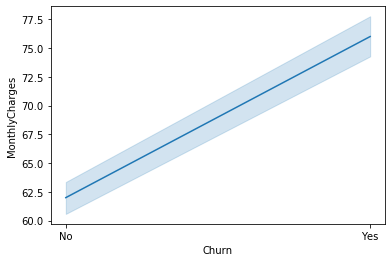

In [175]:
sns.lineplot(y='MonthlyCharges',x='Churn',data=data)

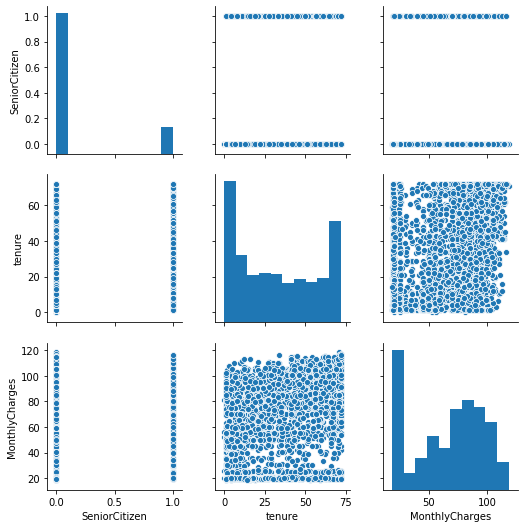

In [176]:
sns.pairplot(data)

Label Encoding

In [109]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [144]:
for col in data.columns:
    dtype=data[col].dtypes
    if dtype=='object':
        le=LabelEncoder()
        data[col]=le.fit_transform(data[col])

In [112]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,1025,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,604,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,54,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,582,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,375,1


In [113]:
data=data.drop("customerID",axis=1)

In [114]:
#Check Skewness
data.skew()

gender             -0.026743
SeniorCitizen       1.856036
Partner             0.046066
Dependents          0.809258
tenure              0.235156
PhoneService       -2.960724
MultipleLines       0.079287
InternetService     0.192050
OnlineSecurity      0.414680
OnlineBackup        0.196293
DeviceProtection    0.155327
TechSupport         0.411615
StreamingTV         0.018820
StreamingMovies    -0.031852
Contract            0.608926
PaperlessBilling   -0.392089
PaymentMethod      -0.111944
MonthlyCharges     -0.270606
TotalCharges        0.012022
Churn               1.084913
dtype: float64

In [115]:
for col in data.columns:
    if data.skew().loc[col] > 0.55:
        data[col]=np.log1p(data[col])
    if data.skew().loc[col]<=0.55:
        data[col]=np.log1p(data[col])

In [116]:
data.skew()

gender             -0.026743
SeniorCitizen       1.856036
Partner             0.046066
Dependents          0.809258
tenure             -0.783828
PhoneService       -2.960724
MultipleLines       0.010739
InternetService    -0.243727
OnlineSecurity      0.225905
OnlineBackup        0.013620
DeviceProtection   -0.026955
TechSupport         0.222972
StreamingTV        -0.163917
StreamingMovies    -0.215466
Contract            0.324905
PaperlessBilling   -0.392089
PaymentMethod      -0.614888
MonthlyCharges     -0.766526
TotalCharges       -2.143787
Churn               1.084913
dtype: float64

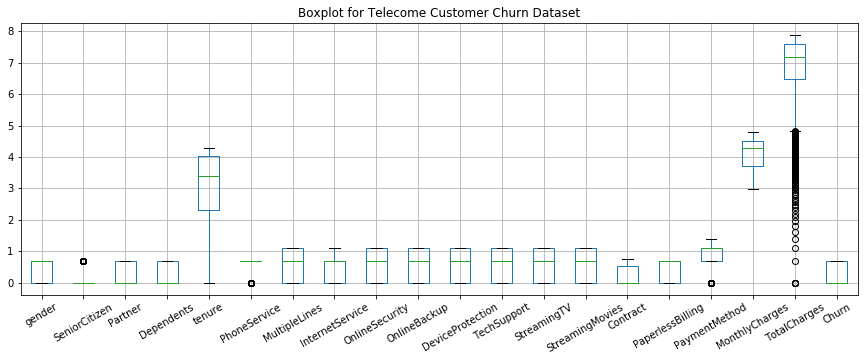

In [117]:
data.plot(kind='box',grid=True,title="Boxplot for Telecome Customer Churn Dataset",legend=True,rot=30,figsize=(15,5))

In [118]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data=data.loc[(z_score < 3).all(axis=1)]
print(data.shape)

(2694, 20)
(2419, 20)


In [119]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2.419000e+03,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000
mean,0.353021,0.113758,0.340986,0.212901,3.056045,6.931472e-01,0.529096,0.597273,0.464632,0.531848,0.542748,0.467357,0.585893,0.596793,0.290732,0.416060,0.812795,4.094955,6.948857,0.182241
std,0.346585,0.256782,0.346600,0.319824,1.151602,3.764434e-14,0.549048,0.400104,0.479408,0.486518,0.486787,0.479882,0.485454,0.484509,0.327766,0.339606,0.503726,0.587141,0.843700,0.305199
min,0.000000,0.000000,0.000000,0.000000,0.693147,6.931472e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.985682,3.806662,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.302585,6.931472e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,3.837299,6.512488,0.000000
50%,0.693147,0.000000,0.000000,0.000000,3.433987,6.931472e-01,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.000000,0.693147,1.098612,4.335328,7.218177,0.000000
75%,0.693147,0.000000,0.693147,0.693147,4.043051,6.931472e-01,1.098612,0.693147,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,0.526589,0.693147,1.098612,4.530177,7.598650,0.693147
max,0.693147,0.693147,0.693147,0.693147,4.290459,6.931472e-01,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,0.741276,0.693147,1.386294,4.784571,7.869402,0.693147


In [120]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000e+00,-2.945446e-02,1.311911e-02,4.228486e-02,-7.802776e-03,3.081869e-14,-2.211204e-03,-2.142634e-02,-2.667874e-02,8.493839e-03,-4.994143e-03,-2.107754e-02,-9.469491e-03,5.096841e-03,2.321327e-03,-2.279932e-02,3.659500e-02,-2.580346e-02,3.752210e-03,-1.111232e-02
SeniorCitizen,-2.945446e-02,1.000000e+00,1.049362e-02,-2.055072e-01,3.558112e-03,-8.035976e-16,1.067814e-01,8.538986e-04,-1.523310e-01,-3.487461e-02,-2.210384e-02,-1.546973e-01,2.434335e-02,6.826495e-03,-1.387383e-01,1.474239e-01,-2.963306e-02,2.270771e-01,3.424701e-02,1.232743e-01
Partner,1.311911e-02,1.049362e-02,1.000000e+00,4.705079e-01,3.891663e-01,2.809459e-14,1.404875e-01,-7.582422e-03,1.541462e-01,1.503865e-01,1.450648e-01,1.143236e-01,1.085266e-01,1.184779e-01,2.810601e-01,2.651083e-02,-1.549026e-01,6.526626e-02,4.363497e-02,-1.519100e-01
Dependents,4.228486e-02,-2.055072e-01,4.705079e-01,1.000000e+00,1.850834e-01,-1.554654e-15,-1.942635e-02,1.188098e-02,1.692551e-01,1.010868e-01,9.218771e-02,1.324752e-01,8.802013e-02,6.508056e-02,2.409840e-01,-8.778231e-02,-4.768005e-02,-1.170499e-01,-1.550396e-02,-1.655960e-01
tenure,-7.802776e-03,3.558112e-03,3.891663e-01,1.850834e-01,1.000000e+00,-8.996724e-15,3.607649e-01,-1.421525e-02,2.881561e-01,3.552944e-01,3.363779e-01,2.827290e-01,2.663295e-01,2.858937e-01,6.148118e-01,2.300901e-02,-3.631366e-01,1.701413e-01,6.617866e-02,-3.607059e-01
PhoneService,3.081869e-14,-8.035976e-16,2.809459e-14,-1.554654e-15,-8.996724e-15,1.000000e+00,-2.759772e-14,2.132000e-14,-1.425159e-15,-6.049764e-15,-7.261615e-15,-1.409992e-15,-1.012530e-14,-1.039864e-14,-7.335190e-15,4.639304e-14,1.210062e-14,-1.844926e-14,-1.754051e-15,-1.275843e-15
MultipleLines,-2.211204e-03,1.067814e-01,1.404875e-01,-1.942635e-02,3.607649e-01,-2.759772e-14,1.000000e+00,-3.830581e-02,-2.706424e-02,1.092229e-01,8.384075e-02,-3.058188e-04,1.482074e-01,1.568304e-01,1.202569e-01,1.616552e-01,-1.692755e-01,4.115722e-01,1.086985e-01,2.762699e-02
InternetService,-2.142634e-02,8.538986e-04,-7.582422e-03,1.188098e-02,-1.421525e-02,2.132000e-14,-3.830581e-02,1.000000e+00,8.945681e-03,1.195918e-01,1.184255e-01,2.013953e-02,1.951843e-01,1.717157e-01,5.803502e-02,-1.026976e-01,4.160544e-02,-4.566411e-01,-1.018231e-01,2.445475e-02
OnlineSecurity,-2.667874e-02,-1.523310e-01,1.541462e-01,1.692551e-01,2.881561e-01,-1.425159e-15,-2.706424e-02,8.945681e-03,1.000000e+00,2.308124e-01,2.132524e-01,3.209115e-01,8.262587e-02,1.125494e-01,3.875577e-01,-1.694799e-01,-7.068546e-02,-2.106198e-01,3.361725e-02,-3.212848e-01
OnlineBackup,8.493839e-03,-3.487461e-02,1.503865e-01,1.010868e-01,3.552944e-01,-6.049764e-15,1.092229e-01,1.195918e-01,2.308124e-01,1.000000e+00,2.056752e-01,2.158228e-01,1.639921e-01,1.439443e-01,3.146491e-01,-3.707926e-02,-1.297034e-01,-6.671251e-02,6.488749e-02,-2.336857e-01


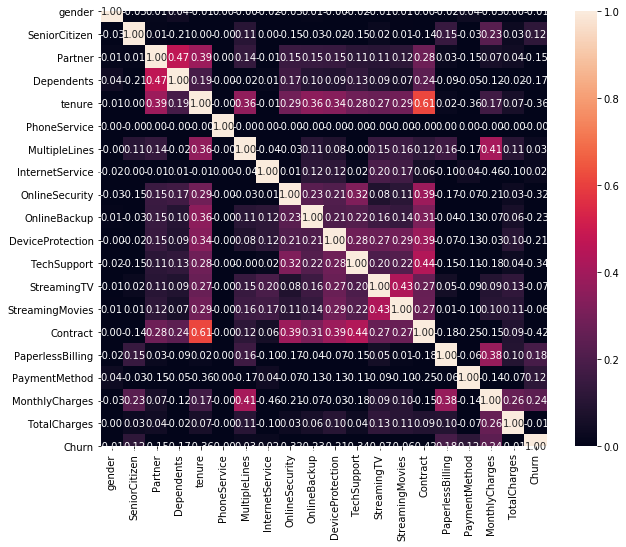

In [121]:
#showing the corelation with a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',vmax=1,vmin=0)
plt.show()

Features and Target Value

In [122]:
x=data.drop("Churn",axis=1)
y=data["Churn"]

In [123]:
x.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,0.693147,0.0,0.0,0.0,3.555348,0.693147,0.0,0.0,1.098612,0.000000,1.098612,0.0,0.0,0.0,0.526589,0.000000,1.386294,4.059581,6.405228
2,0.693147,0.0,0.0,0.0,1.098612,0.693147,0.0,0.0,1.098612,1.098612,0.000000,0.0,0.0,0.0,0.000000,0.693147,1.386294,4.004602,4.007333


In [124]:
y.head(2)

1    0.000000
2    0.693147
Name: Churn, dtype: float64

In [125]:
y=y.round().astype(int)
y.unique()

array([0, 1], dtype=int64)

In [126]:
y=np.array(y)
y=y.reshape(-1,1)
y.shape

(2419, 1)

Standardisation

In [127]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)
x

array([[ 9.81567128e-01, -4.43102987e-01, -9.84005530e-01, ...,
         1.13875008e+00, -6.02616549e-02, -6.44471696e-01],
       [ 9.81567128e-01, -4.43102987e-01, -9.84005530e-01, ...,
         1.13875008e+00, -1.53918528e-01, -3.48717610e+00],
       [-1.01877902e+00, -4.43102987e-01, -9.84005530e-01, ...,
         5.67524093e-01,  3.02435470e-01, -1.20834201e+00],
       ...,
       [ 9.81567128e-01,  2.25681169e+00,  1.01625445e+00, ...,
        -2.37573723e-01,  5.19632090e-01,  7.25839397e-01],
       [-1.01877902e+00, -4.43102987e-01, -9.84005530e-01, ...,
         5.67524093e-01,  1.79640285e-03,  2.42072542e-01],
       [ 9.81567128e-01, -4.43102987e-01, -9.84005530e-01, ...,
        -1.61389753e+00, -1.84718732e+00, -1.44869190e+00]])

Spilt Train and Test

In [129]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [130]:
#create best random_state
def rst(mod,x,y):
    max_r=0
    for rn_state in range (25,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=rn_state)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        acs=accuracy_score(pred,y_test)
        f1=f1_score(y_test,pred)
        cnf=confusion_matrix(y_test,pred)
        clr=classification_report(y_test,pred)
        
        fpr,tpr,thresholds=roc_curve(y_test,pred)
        roc_auc=auc(fpr,tpr)

        if acs > max_r:
            max_r=acs
            random_state=rn_state
    print("random_state for mod"," is ",random_state,"which gives accuracy score of: ",max_r)
    #print('f1_score: ', f1)
    print('confusion matrix: ',cnf)
    print('classification report: ',clr)
    print("fpr: ",fpr)
    print("tpr: ",tpr)
    print("thresholds: ",thresholds)
    print("roc_auc: ",roc_auc)
    print()
    print('prediction: ',pred)
     

    plt.plot([0,1],[0,1],color='red',linestyle="dashdot")
    plt.plot(fpr,tpr,label="AUC= %0.4f" % roc_auc)
    plt.legend(loc='best',fontsize='medium',shadow=True)
    plt.xlabel("FPR")
    plt.ylabel('TPR')
    plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='right')
    plt.show()
    
    return random_state

Logistic Regression

random_state for mod  is  31 which gives accuracy score of:  0.8333333333333334
confusion matrix:  [[468  67]
 [ 75 116]]
classification report:                precision    recall  f1-score   support

           0       0.86      0.87      0.87       535
           1       0.63      0.61      0.62       191

    accuracy                           0.80       726
   macro avg       0.75      0.74      0.74       726
weighted avg       0.80      0.80      0.80       726

fpr:  [0.         0.12523364 1.        ]
tpr:  [0.         0.60732984 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.7410480990360621

prediction:  [0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 1

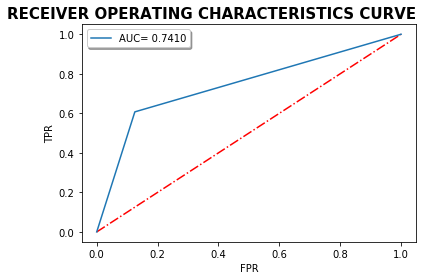

In [131]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr_g=rst(lr,x,y)

In [132]:
#Cross Validation
accuracy_score_1=cross_val_score(lr,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_1

0.7990840477931302

DecisionTree

In [133]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_param={'criterion':['gini','entropy'],'max_depth':range(3,10)}
dt_g=GridSearchCV(dt,dt_param,cv=15)
dt_g.fit(x,y)
dt_g.best_params_

{'criterion': 'entropy', 'max_depth': 4}

random_state for mod  is  82 which gives accuracy score of:  0.8292011019283747
confusion matrix:  [[483  52]
 [ 95  96]]
classification report:                precision    recall  f1-score   support

           0       0.84      0.90      0.87       535
           1       0.65      0.50      0.57       191

    accuracy                           0.80       726
   macro avg       0.74      0.70      0.72       726
weighted avg       0.79      0.80      0.79       726

fpr:  [0.         0.09719626 1.        ]
tpr:  [0.        0.5026178 1.       ]
thresholds:  [2 1 0]
roc_auc:  0.7027107696824386

prediction:  [0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 1 0 

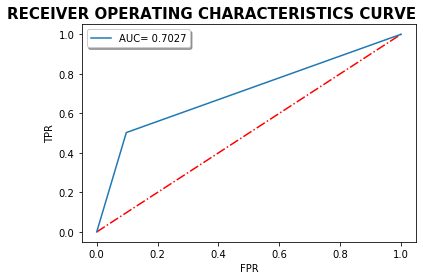

In [134]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtc=rst(dt,x,y)

In [135]:
#Cross Validation
accuracy_score_3=cross_val_score(dt,x,y,scoring='accuracy',cv=15).mean()
accuracy_score_3

0.8015595365897298

GaussianNB

random_state for mod  is  98 which gives accuracy score of:  0.803030303030303
confusion matrix:  [[404 131]
 [ 44 147]]
classification report:                precision    recall  f1-score   support

           0       0.90      0.76      0.82       535
           1       0.53      0.77      0.63       191

    accuracy                           0.76       726
   macro avg       0.72      0.76      0.72       726
weighted avg       0.80      0.76      0.77       726

fpr:  [0.         0.24485981 1.        ]
tpr:  [0.         0.76963351 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.7623868473846453

prediction:  [0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1
 0 1 1 

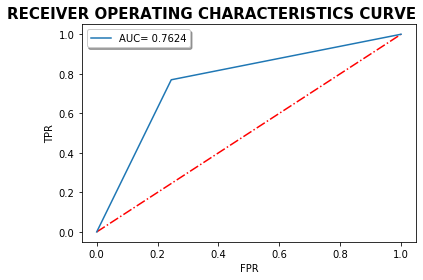

In [136]:
nb=GaussianNB()
gnb=rst(nb,x,y)

In [137]:
#Cross Validation
accuracy_score_4=cross_val_score(nb,x,y,scoring='accuracy',cv=5).mean()
accuracy_score_4

0.7713948210354225

KNN

In [138]:
kn=KNeighborsClassifier()
kn_param={'n_neighbors':range(1,10),'leaf_size':range(20,70)}
kn_g=GridSearchCV(kn,kn_param,cv=15)
kn_g.fit(x,y)
kn_g.best_params_

{'leaf_size': 20, 'n_neighbors': 8}

random_state for mod  is  88 which gives accuracy score of:  0.8071625344352618
confusion matrix:  [[474  61]
 [104  87]]
classification report:                precision    recall  f1-score   support

           0       0.82      0.89      0.85       535
           1       0.59      0.46      0.51       191

    accuracy                           0.77       726
   macro avg       0.70      0.67      0.68       726
weighted avg       0.76      0.77      0.76       726

fpr:  [0.         0.11401869 1.        ]
tpr:  [0.         0.45549738 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.6707393453050838

prediction:  [0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1

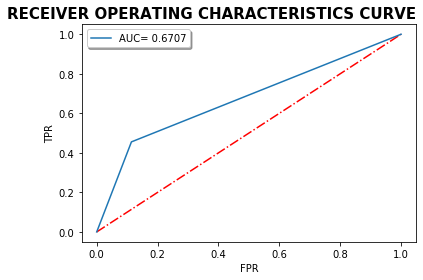

In [139]:
kn=KNeighborsClassifier(n_neighbors=8,leaf_size=20)
knn=rst(kn,x,y)

In [140]:
#Cross Validation
accuracy_score_5=cross_val_score(kn,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_5

0.776380412815301

Gradient Boosting

In [141]:
gb=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=85)

gb_param= {"learning_rate": [0.0001,0.025,0.1,1.0], "n_estimators":[250,500,750,1000]}

gb_g= GridSearchCV(gb,gb_param,cv=15)
gb_g.fit(x_train,y_train)
print("best parameters:", gb_g.best_params_)
print("\n best score:",gb_g.best_score_)

best parameters: {'learning_rate': 0.025, 'n_estimators': 250}

 best score: 0.7944477259303012


random_state for mod  is  82 which gives accuracy score of:  0.837465564738292
confusion matrix:  [[472  63]
 [ 78 113]]
classification report:                precision    recall  f1-score   support

           0       0.86      0.88      0.87       535
           1       0.64      0.59      0.62       191

    accuracy                           0.81       726
   macro avg       0.75      0.74      0.74       726
weighted avg       0.80      0.81      0.80       726

fpr:  [0.         0.11775701 1.        ]
tpr:  [0.         0.59162304 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.73693301365171

prediction:  [0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 

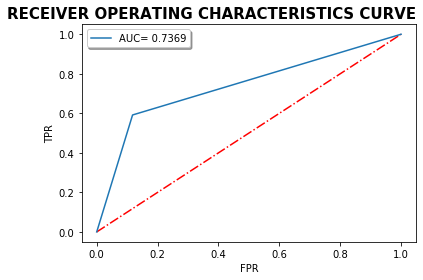

In [142]:
gb=GradientBoostingClassifier(learning_rate=0.025, n_estimators= 250)
gbc=rst(gb,x,y)

In [143]:
#Cross Validation
accuracy_score_6=cross_val_score(gb,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_6

0.8110641884144545

In [ ]:
import joblib
joblib.dump(gb,"GB_TeleChurn.pkl")